## End to End ML Project - Housing Price Prediction

1. Look at the big picture.

2. Get the data.

3. Explore and visualize the data to gain insights.

4. Prepare the data for machine learning algorithms.

5. Select a model and train it.

6. Fine-tune your model.

7. Present your solution.

8. Launch, monitor, and maintain your system.


**Popular open data repositories:**

OpenML.org

Kaggle.com

PapersWithCode.com

UC Irvine Machine Learning Repository

Amazon’s AWS datasets

TensorFlow datasets

Meta portals (they list open data repositories):

DataPortals.org

OpenDataMonitor.eu

Other pages listing many popular open data repositories:

Wikipedia’s list of machine learning datasets

Quora.com

The datasets subreddit

## Checklist for ML Project

This checklist can guide you through your machine learning projects. There are eight main steps:

1. Frame the problem and look at the big picture.

2. Get the data.

3. Explore the data to gain insights.

4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.

5. Explore many different models and shortlist the best ones.

6. Fine-tune your models and combine them into a great solution.

7. Present your solution.

8. Launch, monitor, and maintain your system.



### The problem is a supervised, regression, batch problem 

#### Performance Measurement (Cost Function)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <mtext>RMSE</mtext>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">X</mi>
      <mo>,</mo>
      <mi>h</mi>
      <mo>)</mo>
    </mrow>
    <mo>=</mo>
    <msqrt>
      <mrow>
        <mfrac><mn>1</mn> <mi>m</mi></mfrac>
        <munderover><mo>∑</mo> <mrow><mi>i</mi><mo>=</mo><mn>1</mn></mrow> <mi>m</mi> </munderover>
        <msup><mfenced separators="" open="" close=")"><mi>h</mi><mrow><mo>(</mo><msup><mi mathvariant="bold">x</mi> <mrow><mo>(</mo><mi>i</mi><mo>)</mo></mrow> </msup><mo>)</mo></mrow><mo>-</mo><msup><mi>y</mi> <mrow><mo>(</mo><mi>i</mi><mo>)</mo></mrow> </msup></mfenced> <mn>2</mn> </msup>
      </mrow>
    </msqrt>
  </mrow>
</math>

- M :- total instances
- X(i) :- ith Record, Where X is a matrix
- h :- Estimatior Function


RMSE Is one of the Cost Functions you can also use Mean Abs Error if you thing outliers may effect the estimations

- Computing the root of a sum of squares (RMSE) corresponds to the Euclidean norm: this is the notion of distance we are all familiar with. It is also called the ℓ2 norm, noted ∥ · ∥2 (or just ∥ · ∥).

- Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm, noted ∥ · ∥1. This is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

1. Frame the problem

Define the objective in business terms.

How will your solution be used?

What are the current solutions/workarounds (if any)?

How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

How should performance be measured?

Is the performance measure aligned with the business objective?

What would be the minimum performance needed to reach the business objective?

What are comparable problems? Can you reuse experience or tools?

Is human expertise available?

How would you solve the problem manually?

List the assumptions you (or others) have made so far.

Verify assumptions if possible.


2. Explore the data

Explore the Data
Note: try to get insights from a field expert for these steps.

Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

Create a Jupyter notebook to keep a record of your data exploration.

Study each attribute and its characteristics:

Name

Type (categorical, int/float, bounded/unbounded, text, structured, etc.)

% of missing values

Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)

Usefulness for the task

Type of distribution (Gaussian, uniform, logarithmic, etc.)

For supervised learning tasks, identify the target attribute(s).

Visualize the data.

Study the correlations between attributes.

Study how you would solve the problem manually.

Identify the promising transformations you may want to apply.

Identify extra data that would be useful (go back to “Get the Data”).

Document what you have learned.


3. Prepare the data

Prepare the Data
Notes:

Work on copies of the data (keep the original dataset intact).

Write functions for all data transformations you apply, for five reasons:

So you can easily prepare the data the next time you get a fresh dataset

So you can apply these transformations in future projects

To clean and prepare the test set

To clean and prepare new data instances once your solution is live

To make it easy to treat your preparation choices as hyperparameters

Clean the data:

Fix or remove outliers (optional).

Fill in missing values (e.g., with zero, mean, median…​) or drop their rows (or columns).

Perform feature selection (optional):

Drop the attributes that provide no useful information for the task.

Perform feature engineering, where appropriate:

Discretize continuous features.

Decompose features (e.g., categorical, date/time, etc.).

Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).

Aggregate features into promising new features.

Perform feature scaling:

Standardize or normalize features.



Shortlist Promising Models
Notes:

If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or random forests).

Once again, try to automate these steps as much as possible.

Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, random forest, neural net, etc.) using standard parameters.

Measure and compare their performance:

For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

Analyze the most significant variables for each algorithm.

Analyze the types of errors the models make:

What data would a human have used to avoid these errors?

Perform a quick round of feature selection and engineering.

Perform one or two more quick iterations of the five previous steps.

Shortlist the top three to five most promising models, preferring models that make different types of errors.

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [5]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

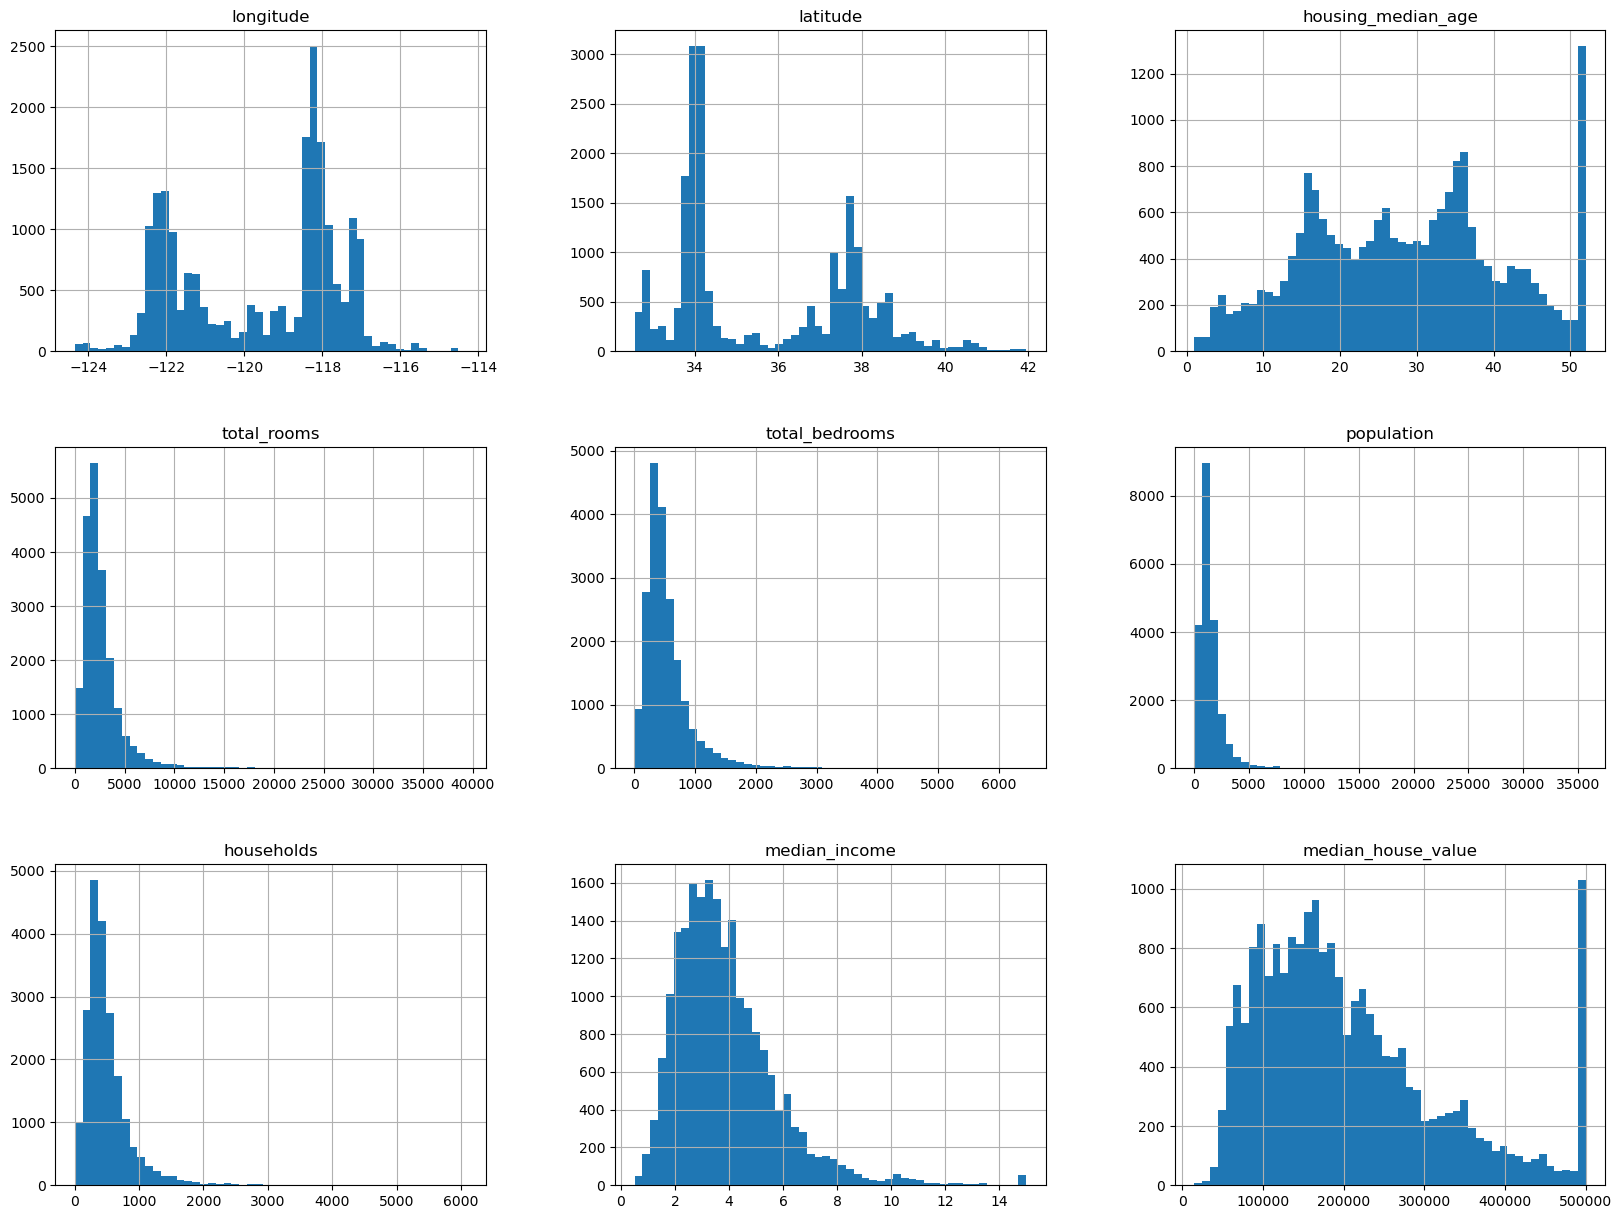

In [10]:
housing.hist(bins=50, figsize=(20, 15))

- From the above Chart we can notice few things

1. House Median age, Median Income, Median House Value are capped this means that the model will not learn if the capped features are beyound the limit
    Working with preprocessed attributes is common in machine learning, and it is not necessarily a problem, but you
   should try to understand how the data was computed.
2. The Distribution for few features are Sweked the Ml Algo might fail in detecting the Patters(use Some transformation to make it better...(log, sqrt...))

# Dealing with Capped Target Variables in Machine Learning

This document explains the issue of capped target variables (like house prices) and its impact on model training and prediction.

## The Problem: Capped Data

When a target variable (e.g., median house value) is capped, values exceeding a certain threshold are recorded *incorrectly* as that threshold. For example, houses worth more than $500,000 might all be listed as $500,000. This creates a distorted view of the true price distribution.

## Why is this a problem?

Models trained on capped data learn that the target variable never goes beyond the cap. This severely limits their predictive ability for values above the cap, leading to systematic underestimation.

## Checking with the Client

Before addressing the issue, consult with the team that will use the model's output.  If accurate predictions above the cap are crucial, then action must be taken. If not, and the client is only interested in properties below the cap, then the capped data may be sufficient.

## Solutions

Two main solutions exist:

1. **Collect Proper Labels:** The best approach is to obtain the true, uncapped values for the affected instances. This gives the model accurate information across the full price range and allows it to learn correctly. This might involve going back to the original data source or finding another reliable source for the true values.

2. **Remove Capped Districts:** If obtaining correct labels is infeasible, remove the affected districts from *both* the training and test sets. This creates a consistent (though potentially smaller) dataset for training and evaluation. This ensures that the model isn't penalized for predicting values above the cap during evaluation, as those instances have been removed.  However, the model will then be unable to make predictions for the removed districts.

## Trade-offs

* **Collecting correct labels:** Ideal for model accuracy, enabling predictions across the full price range, but might be time-consuming, costly, or even impossible depending on data availability.
* **Removing capped districts:** Simpler and faster, but reduces the scope of the model's predictions and might lead to biased results if the removed districts have unique characteristics.

Choose the solution that best aligns with the client's needs and available resources.  Consider the impact each solution has on the model's applicability and the interpretation of its predictions.


## Split the Data

- Random Sampling Works well for larger Datasets otherwise it will introduct Sampling Bias to overcome(We know that mediam income is important feature for house prediction), we make sure that test set contains the Good Proposition Median Income Records

- median income is a very important attribute to predict median housing prices. You may want to
    ensure that the test set is representative of the various categories of incomes in
    the whole dataset.

In [11]:
import numpy as np

In [12]:
def shuffel_and_aplit_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffel_and_aplit_data(housing, 0.2)

In [14]:
housing['median_income'].sort_values(ascending=True)

17071     0.4999
12089     0.4999
11939     0.4999
73        0.4999
14323     0.4999
          ...   
18825    15.0001
20183    15.0001
16101    15.0001
12500    15.0001
3288     15.0001
Name: median_income, Length: 20640, dtype: float64

In [15]:
housing['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.2670      1
2.1217      1
4.9706      1
3.4450      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [16]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])  

Text(0, 0.5, 'Number of districts')

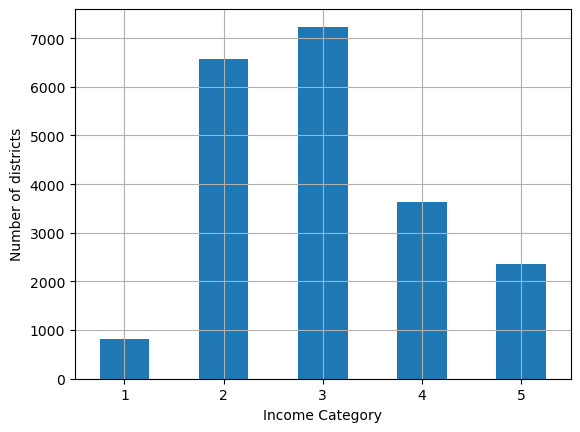

In [17]:
housing['income_cat'].value_counts().sort_index().plot.bar(grid=True, rot=0)
plt.xlabel('Income Category')
plt.ylabel('Number of districts')

In [18]:
#Startified Sampling

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
spilter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

data_splits = []
for train_index, test_index in spilter.split(housing, housing['income_cat']): # income_cat is the strata
    housing_train = housing.loc[train_index]
    housing_test = housing.loc[test_index]
    data_splits.append((housing_train, housing_test))

In [21]:
train_set, test_set = data_splits[0]

In [22]:
len(train_set), len(test_set), len(test_set)/len(housing)

(16512, 4128, 0.2)

In [23]:
test_set['income_cat'].value_counts().sort_index(), housing['income_cat'].value_counts().sort_index(), (test_set['income_cat'].value_counts().sort_index()/ housing['income_cat'].value_counts().sort_index())

(income_cat
 1     165
 2    1316
 3    1447
 4     728
 5     472
 Name: count, dtype: int64,
 income_cat
 1     822
 2    6581
 3    7236
 4    3639
 5    2362
 Name: count, dtype: int64,
 income_cat
 1    0.200730
 2    0.199970
 3    0.199972
 4    0.200055
 5    0.199831
 Name: count, dtype: float64)

In [24]:
##Check if sampling is correct(consider test set if the number of samples are having approximat samples)

test_set['income_cat'].value_counts().sort_index() / len(test_set)

income_cat
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: count, dtype: float64

In [25]:
train_set = train_set.drop('income_cat', axis=1)
test_set = test_set.drop('income_cat', axis=1)

In [26]:
##Data Visualition

In [27]:
housing = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

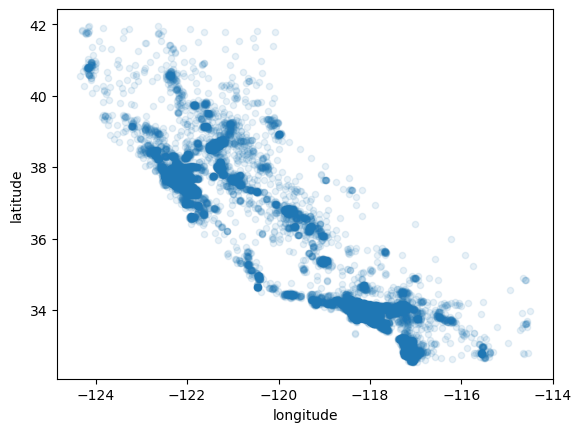

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

In [29]:
##Visualizing the data with more parameters

In [30]:
import seaborn as sns

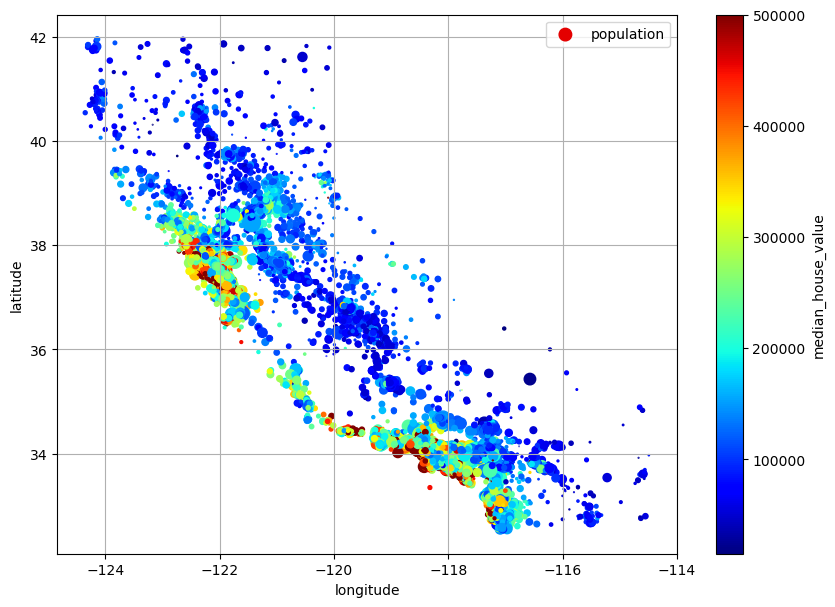

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [32]:
##Look for coorelations

In [33]:
corr_matrix = housing.corr(numeric_only=True)

In [34]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [35]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

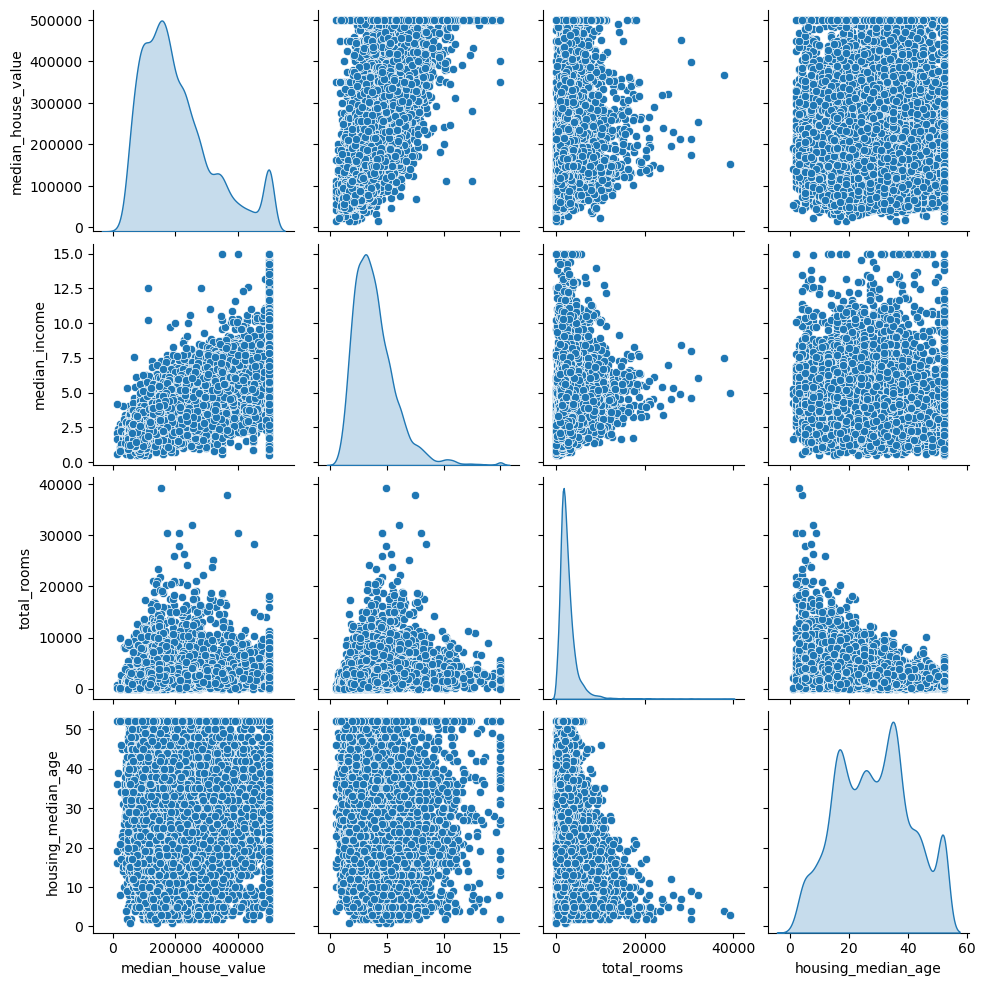

In [36]:
sns.pairplot(housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']], diag_kind='kde')

<Axes: xlabel='median_income', ylabel='median_house_value'>

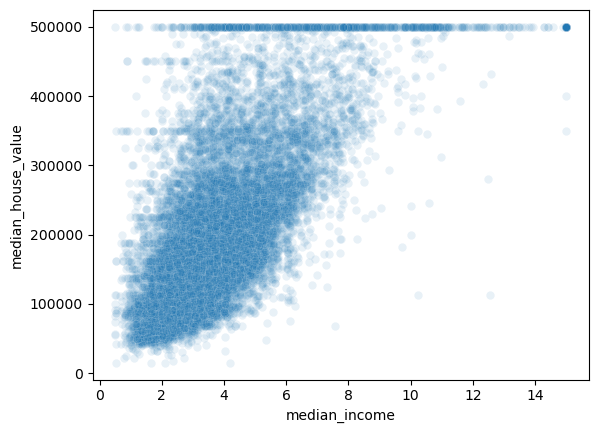

In [37]:
sns.scatterplot(data=housing, x='median_income', y='median_house_value', alpha=0.1)

In [38]:
##The above plot clearly shows the positive coorelation between the median_income and median_house_value

In [39]:
## Experiment with attribute Combinations

In [40]:
##Create a new features
#1. Rooms per household
#2. Bedrooms ratio
#3. population per house

In [41]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [42]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [43]:
housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_ratio             -0.256397
Name: median_house_value, dtype: float64

In [44]:
# Prepare the data for ML

In [45]:
housing = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

In [46]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [47]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [48]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [49]:
#Clean the data, total bedrooms has some missing values
#1. Remove the districts with missing values
#2. Remove the whole attribute
#3. Set the values to some value(0, mean, median)

##here we will use the median value to fill the missing values because it is less descructive

In [50]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [51]:
#Exclude the categorical values, because median works only on numerical values
housing_num = housing.select_dtypes(include=[np.number])

In [52]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [53]:
##results are stores in statistics_ instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [54]:
#imputer.transform, to replace the learnt median values in the training dataset
# housing['total_bedrooms'].isnull().sum()
# housing['total_bedrooms'] = imputer.transform(housing_num)
# housing['total_bedrooms'].isnull().sum()

X = imputer.transform(housing_num) # apply the transformed median to the dataset
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])


There are also more powerful imputers available in the sklearn.impute package (both for numerical features only):

Imputers:
1. **KNNImputer**:
    - Replaces each missing value with the mean of the k-nearest neighbors’ values for that feature.
    - The distance metric is based on all the available features.
    - Suitable for numerical features only.

2. **IterativeImputer**:
    - Trains a regression model per feature to predict the missing values based on all the other available features.
    - The model is trained iteratively on the updated data, improving the models and the replacement values at each iteration.
    - Suitable for numerical features only.


## Scikit-Learn Design Principles

Scikit-Learn’s API is remarkably well designed. These are the main design principles:

### Consistency
All objects share a consistent and simple interface:

#### Estimators
Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a `SimpleImputer` is an estimator). The estimation itself is performed by the `fit()` method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a `SimpleImputer`’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

#### Transformers
Some estimators (such as a `SimpleImputer`) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a `SimpleImputer`. All transformers also have a convenience method called `fit_transform()`, which is equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster).

#### Predictors
Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the `LinearRegression` model is a predictor: given a country’s GDP per capita, it predicts life satisfaction. A predictor has a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a `score()` method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).

### Inspection
All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., `imputer.strategy`), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., `imputer.statistics_`).

### Nonproliferation of Classes
Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

### Composition
Existing building blocks are reused as much as possible. For example, it is easy to create a `Pipeline` estimator from an arbitrary sequence of transformers followed by a final estimator.

### Sensible Defaults
Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.

In [55]:
#Handeling Text and Categorical Attributes

In [56]:
housing_cat = housing[['ocean_proximity']]

In [57]:
housing_cat.value_counts() #Most of the ML algo works with numbers lets convert this to numeric

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

np.unique(ordinal_encoder.fit_transform(housing_cat))

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [59]:
ordinal_encoder.categories_ #To get the categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- One issue with this representation(Ordinal Encoder) is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1)

## One-Hot Encoding for Categorical Attributes

When using ordinal encoding on categorical features, machine learning algorithms might assume that nearby values are more similar than distant ones. This can be problematic when the order assigned to categories does not reflect the true relationship between them.

For example, consider the `ocean_proximity` feature, which has categories like "<1H OCEAN," "INLAND," "NEAR OCEAN," etc. If these categories are ordinally encoded as 0, 1, 2, ..., the algorithm might incorrectly assume that "INLAND" (1) is more similar to "<1H OCEAN" (0) than "NEAR OCEAN" (4). This is not true, as "NEAR OCEAN" is geographically closer to "<1H OCEAN."

One-hot encoding addresses this issue by creating a separate binary attribute (0 or 1) for each category. This way, no order or distance relationship is implied between categories. Each category is treated independently.

### Example:

Suppose you are building a model to predict housing prices, and one of your features is the neighborhood. The neighborhoods are:
- Downtown
- Suburb
- Rural

#### Ordinal Encoding:

If you ordinally encode the neighborhoods as 1, 2, and 3, the model might assume that "Suburb" is more similar to "Downtown" than "Rural." However, this may not be true in your city.

#### One-Hot Encoding:

One-hot encoding would create three separate binary features:
- `IsDowntown` (1 if the neighborhood is Downtown, 0 otherwise)
- `IsSuburb` (1 if the neighborhood is Suburb, 0 otherwise)
- `IsRural` (1 if the neighborhood is Rural, 0 otherwise)

This avoids implying any order or distance relationship between the neighborhoods, allowing the model to learn the true impact of each neighborhood on housing prices.

In [60]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

housing_cat_1hot ##returns a sparse matrix(it represents non zero elements saving a lot of memory), to convert it to numpy array use toarray()

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [61]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [62]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [63]:
"""
Pandas has a function called get_dummies(), which also converts each categorical feature into a one-hot representation, with one binary feature per category

>>> df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
>>> pd.get_dummies(df_test)
   ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                       1                         0
1                       0                         1
"""

"""
so why not use it instead of OneHotEncoder? Well, the advantage of OneHotEncoder is that it remembers which categories it was trained on. 
This is very important because once your model is in production, it should be fed exactly the same features as during training
"""

'\nso why not use it instead of OneHotEncoder? Well, the advantage of OneHotEncoder is that it remembers which categories it was trained on. \nThis is very important because once your model is in production, it should be fed exactly the same features as during training\n'

## Feature Scaling and Transformation

- One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, machine learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms.

### There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

- Min-max scaling (many people call this normalization) is the simplest: for each attribute, the values are shifted and rescaled so that they end up ranging from 0 to 1. This is performed by subtracting the min value and dividing by the difference between the min and the max. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1 (e.g., neural networks work best with zero-mean inputs, so a range of –1 to 1 is preferable).

- Standardization is different: first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1). Unlike min-max scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers. For example, suppose a district has a median income equal to 100 (by mistake), instead of the usual 0–15. Min-max scaling to the 0–1 range would map this outlier down to 1 and it would crush all the other values down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization:

In [64]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler() ## x - min(x) / max(x) - min(x)

scalar.fit_transform(housing_num)

array([[0.19574037, 0.55851064, 1.        , ..., 0.09649123, 0.19283181,
        0.11026055],
       [0.60547667, 0.16914894, 0.76470588, ..., 0.04066986, 0.06645511,
        0.38535331],
       [0.24036511, 0.61808511, 0.62745098, ..., 0.03429027, 0.03770767,
        0.1333154 ],
       ...,
       [0.73935091, 0.00425532, 0.23529412, ..., 0.17243283, 0.14168378,
        0.24563109],
       [0.60344828, 0.1606383 , 0.70588235, ..., 0.10563121, 0.15624417,
        0.25141722],
       [0.19675456, 0.54361702, 0.84313725, ..., 0.04165133, 0.03938772,
        0.19195597]])

In [65]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler() ## x - mean(x) / std(x)
std_scaler.fit_transform(housing_num)

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [66]:
"""
This module provides functions to transform features with heavy-tailed distributions
to make them more suitable for machine learning models. When a feature's distribution
has a heavy tail, both min-max scaling and standardization can squash most values into
a small range, which is not ideal for machine learning models. To address this, the
module includes transformations to shrink the heavy tail and make the distribution
roughly symmetrical.

Functions:
    - sqrt_transform: Applies a square root transformation to positive features with
      a heavy tail to the right.
    - power_transform: Raises the feature to a power between 0 and 1 to reduce the
      heavy tail.
    - log_transform: Applies a logarithmic transformation to features with a really
      long and heavy tail, such as those following a power law distribution.

Example:
    The population feature, which roughly follows a power law distribution, can be
    transformed using the log_transform function to make it closer to a Gaussian
    distribution (i.e., bell-shaped).
"""

"\nThis module provides functions to transform features with heavy-tailed distributions\nto make them more suitable for machine learning models. When a feature's distribution\nhas a heavy tail, both min-max scaling and standardization can squash most values into\na small range, which is not ideal for machine learning models. To address this, the\nmodule includes transformations to shrink the heavy tail and make the distribution\nroughly symmetrical.\n\nFunctions:\n    - sqrt_transform: Applies a square root transformation to positive features with\n      a heavy tail to the right.\n    - power_transform: Raises the feature to a power between 0 and 1 to reduce the\n      heavy tail.\n    - log_transform: Applies a logarithmic transformation to features with a really\n      long and heavy tail, such as those following a power law distribution.\n\nExample:\n    The population feature, which roughly follows a power law distribution, can be\n    transformed using the log_transform function 

[]

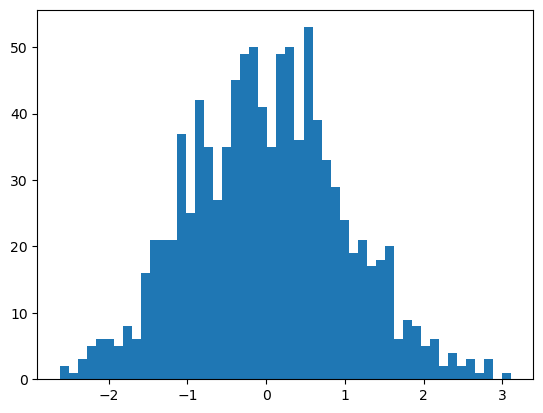

In [67]:
x = np.random.normal(size=1000)

plt.hist(x, bins=50)

plt.plot()

array([[<Axes: title={'center': 'population'}>]], dtype=object)

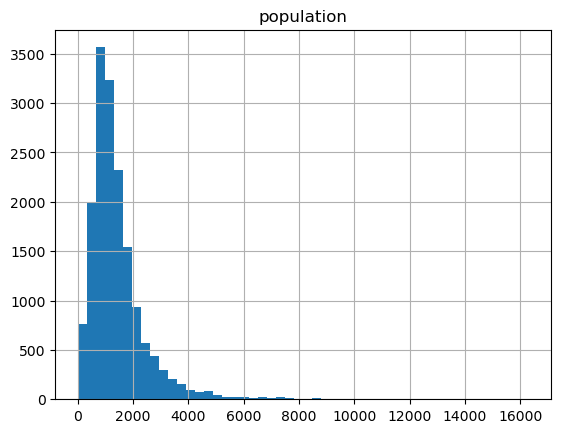

In [68]:
housing[['population']].hist(bins=50)

array([[<Axes: title={'center': 'population'}>]], dtype=object)

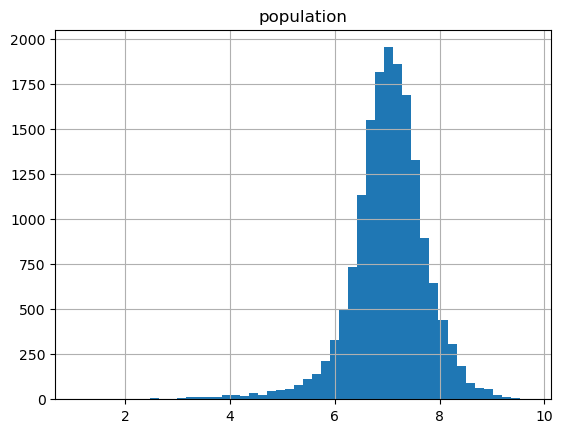

In [69]:
np.log(housing[['population']]).hist(bins=50)

## Feature Transformation Using RBF (Radial Basis Function)

For features with multimodal distributions (having multiple peaks/modes), there are two main approaches:

1. **Bucketization with Categorical Encoding**
    - Split the feature into buckets
    - Treat bucket IDs as categories 
    - Use one-hot encoding on the buckets
    - Don't use too many buckets to avoid dimensionality explosion

2. **RBF Similarity Features**
    - Add a feature for each mode representing similarity
    - Uses radial basis function to compute similarity
    - Most common is Gaussian RBF: exp(-γ(x - mode)²)
    - γ (gamma) controls how quickly similarity decays with distance
    - Can be implemented using sklearn's rbf_kernel()

Key benefits:
- Helps model learn different patterns for different value ranges
- Preserves proximity relationships between values
- More flexible than simple bucketization
- Works well for features with clear modes/peaks

Example visualization shown in plots:
- exp(-((x-2)²)) shows Gaussian RBF similarity to mode at x=2
- Higher values near the mode (2), decaying exponentially as x moves away

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

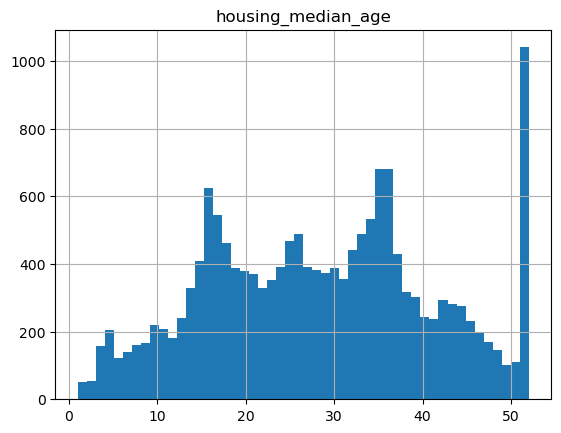

In [70]:
housing[['housing_median_age']].hist(bins=50)

(array([  51.,   55.,  157.,  205.,  123.,  140.,  160.,  165.,  219.,
         207.,  181.,  241.,  328.,  410.,  624.,  544.,  463.,  389.,
         378.,  371.,  328.,  352.,  391.,  468.,  489.,  390.,  381.,
         374.,  389.,  354.,  440.,  487.,  533.,  679.,  679.,  428.,
         317.,  301.,  242.,  236.,  292.,  282.,  277.,  231.,  195.,
         169.,  145.,  102.,  110., 1040.]),
 array([ 1.  ,  2.02,  3.04,  4.06,  5.08,  6.1 ,  7.12,  8.14,  9.16,
        10.18, 11.2 , 12.22, 13.24, 14.26, 15.28, 16.3 , 17.32, 18.34,
        19.36, 20.38, 21.4 , 22.42, 23.44, 24.46, 25.48, 26.5 , 27.52,
        28.54, 29.56, 30.58, 31.6 , 32.62, 33.64, 34.66, 35.68, 36.7 ,
        37.72, 38.74, 39.76, 40.78, 41.8 , 42.82, 43.84, 44.86, 45.88,
        46.9 , 47.92, 48.94, 49.96, 50.98, 52.  ]),
 <BarContainer object of 50 artists>)

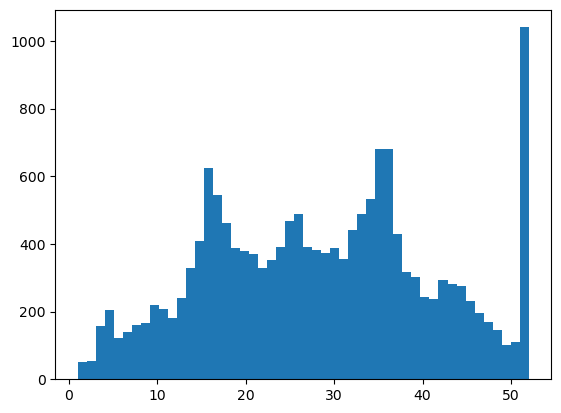

In [71]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

plt.hist(housing['housing_median_age'], bins=50)


- So far we’ve only looked at the input features, but the target values may also need to be transformed. For example, if the target distribution has a heavy tail, you may choose to replace the target with its logarithm. But if you do, the regression model will now predict the log of the median house value, not the median house value itself. You will need to compute the exponential of the model’s prediction if you want the predicted median house value.

In [74]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # to_frame() is used to convert the pandas series to a dataframe

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions) # undo the scaling

## TransformedTargetRegressor Example

This cell demonstrates using `TransformedTargetRegressor` with the housing price prediction model. It's a simpler alternative to manually scaling labels.

Key points:

- `TransformedTargetRegressor` automatically handles scaling of target values
- The model will internally:
    1. Scale the target values before training
    2. Train the regression model
    3. Inverse transform predictions to original scale
- This eliminates need for manual scaling/inverse scaling code

Key benefits:
- More concise code
- Reduced chance of errors
- Automatic handling of transformations

In [75]:
from sklearn.compose import TransformedTargetRegressor

tgtRegg = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler()) # this is a wrapper for the above code

tgtRegg.fit(housing[["median_income"]], housing_labels) # this will automatically scale the target variable`

some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data
tgtRegg.predict(some_new_data)


array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [76]:
# There will a case where we need to use custom transformers we can create it FunctionaTransformer

from sklearn.preprocessing import FunctionTransformer 

logTransformer = FunctionTransformer(np.log, validate=True, inverse_func=np.exp)

log_pop = logTransformer.fit_transform(housing[['population']])

log_pop # this will be the log of the population

logTransformer.inverse_func(log_pop) #`this will be the original population

c:\Users\deepakreddy\Documents\python_programs\ml\MachineLearning\.mlenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


array([[1576.],
       [ 666.],
       [ 562.],
       ...,
       [2814.],
       [1725.],
       [ 682.]])

In [77]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1)) # this will create a transformer which will calculate the rbf kernel with gamma=0.1 and Y=35
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]]) # this will calculate the rbf kernel for the housing_median_age

age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [78]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

- FunctionTransformer is very handy, but what if you would like your transformer to be trainable, learning some parameters in the fit() method and using them later in the transform() method? For this, you need to write a custom class. Scikit-Learn relies on duck typing, so this class does not have to inherit from any particular base class. All it needs is three methods: fit() (which must return self), transform(), and fit_transform().

- You can get fit_transform() for free by simply adding TransformerMixin as a base class: the default implementation will just call fit() and then transform(). If you add BaseEstimator as a base class (and avoid using *args and **kwargs in your constructor), you will also get two extra methods: get_params() and set_params(). These will be useful for automatic hyperparameter tuning.

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

class StandardScalar(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
    
    def fit(self, X, y=None):
        check_array(X)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X, y=None):
        check_is_fitted(self) # this will check if the fit method is called before transform, the fit method should have tailing underscores variables
        X = check_array(X)
        if self.with_mean:
            X = X - self.mean_
        return X  / self.std_
    
scalar = StandardScalar()

scalar.fit(np.linspace(0, 10, 100).reshape(100, 1))

scalar.transform(np.linspace(0, 10, 100).reshape(100, 1))

array([[-1.71481604],
       [-1.68017329],
       [-1.64553055],
       [-1.6108878 ],
       [-1.57624505],
       [-1.5416023 ],
       [-1.50695955],
       [-1.4723168 ],
       [-1.43767406],
       [-1.40303131],
       [-1.36838856],
       [-1.33374581],
       [-1.29910306],
       [-1.26446031],
       [-1.22981757],
       [-1.19517482],
       [-1.16053207],
       [-1.12588932],
       [-1.09124657],
       [-1.05660382],
       [-1.02196108],
       [-0.98731833],
       [-0.95267558],
       [-0.91803283],
       [-0.88339008],
       [-0.84874733],
       [-0.81410459],
       [-0.77946184],
       [-0.74481909],
       [-0.71017634],
       [-0.67553359],
       [-0.64089084],
       [-0.6062481 ],
       [-0.57160535],
       [-0.5369626 ],
       [-0.50231985],
       [-0.4676771 ],
       [-0.43303435],
       [-0.39839161],
       [-0.36374886],
       [-0.32910611],
       [-0.29446336],
       [-0.25982061],
       [-0.22517786],
       [-0.19053512],
       [-0

## Custom StandardScalar Implementation

The `StandardScalar` class is a custom implementation of standard scaling transformation that follows Scikit-Learn's API design principles.

### Key Components:

1. **Base Classes**:
    - `BaseEstimator`: Provides `get_params()` and `set_params()` methods
    - `TransformerMixin`: Provides automatic `fit_transform()` implementation

2. **Methods**:
    - `__init__(with_mean=True)`: Initializes the transformer with configurable mean centering
    - `fit(X, y=None)`: Computes mean and standard deviation of training data
    - `transform(X, y=None)`: Applies the scaling transformation using learned parameters

3. **Safety Features**:
    - Uses `check_array()` to validate input data
    - Uses `check_is_fitted()` to ensure proper method calling sequence
    - Stores number of features in `n_features_in_`

4. **Mathematical Operation**:
    - When `with_mean=True`: `X_scaled = (X - mean) / std`
    - When `with_mean=False`: `X_scaled = X / std`

- This implementation is not 100% complete: all estimators should set feature_names_in_ in the fit() method when they are passed a DataFrame. Moreover, all transformers should provide a get_feature_names_out() method, as well as an inverse_transform() method when their transformation can be reversed

## Transformation Pipelines

## Understanding Pipeline in Scikit-Learn

A Pipeline is a sequence of transformers and estimators that can be treated as a single unit. It's particularly useful for ensuring that:

1. **Data Leakage Prevention**: All transformations are properly applied to training and test data
2. **Code Organization**: Multiple steps are organized in a clean, readable way
3. **Easy Reuse**: The entire sequence can be saved and reapplied to new data

### How Pipeline Works:

1. When you call the pipeline's `fit()` method:
    - It calls `fit_transform()` sequentially on all transformers
    - Passes output of each as input to next
    - Calls only `fit()` on the final estimator

2. When you call `transform()`:
    - Applies all transformations sequentially
    - If last step is predictor, uses `predict()` instead

**The pipeline exposes the same methods as the final estimator. In this example the last estimator is a StandardScaler, which is a transformer, so the pipeline also acts like a transformer. If you call the pipeline’s transform() method, it will sequentially apply all the transformations to the data. If the last estimator were a predictor instead of a transformer, then the pipeline would have a predict() method rather than a transform() method**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scalar', StandardScaler())
])

X = np.linspace(1, 30, 15).reshape(5, 3)

pipeline.fit(X)
pipeline.transform(X)


array([[-1.41421356e+00, -1.41421356e+00, -1.41421356e+00],
       [-7.07106781e-01, -7.07106781e-01, -7.07106781e-01],
       [ 0.00000000e+00,  2.02126845e-16,  0.00000000e+00],
       [ 7.07106781e-01,  7.07106781e-01,  7.07106781e-01],
       [ 1.41421356e+00,  1.41421356e+00,  1.41421356e+00]])

- It would be more convenient to have a single transformer capable of handling all columns, applying the appropriate transformations to each column. For this, you can use a ColumnTransformer

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder())
    ])

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()) ## make_pipeline is a shorthand for Pipeline, it will automatically name the steps

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, housing_num.columns),
    ("cat", cat_pipeline, ["ocean_proximity"])])

full_pipeline.fit_transform(housing)
full_pipeline.get_feature_names_out()

array(['num__longitude', 'num__latitude', 'num__housing_median_age',
       'num__total_rooms', 'num__total_bedrooms', 'num__population',
       'num__households', 'num__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN'], dtype=object)

In [82]:
## you can also use make_column_transformer to create the column transformer just like make_pipeline no need to name the pipeline

from sklearn.compose import make_column_transformer, make_column_selector

pipeline = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

housing_prepared = pipeline.fit_transform(housing)

In [83]:
housing_prepared
pipeline.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

# Creating a Custom Housing Price Transformation Pipeline

Let's create a comprehensive transformation pipeline for the housing price data that will:

1. Handle missing values:
    - Numerical features: Replace with median 
    - Categorical features: Replace with most frequent value

2. Transform categorical features:
    - One-hot encode ocean_proximity 

3. Add engineered features:
    - Bedrooms ratio (bedrooms/total_rooms)
    - Rooms per household (total_rooms/households) 
    - People per household (population/households)
    - Geographic clustering features using RBF kernel

4. Transform skewed features:
    - Apply log transformation to features with long tails
    - Convert back to original scale when needed

5. Scale numerical features:
    - Apply StandardScaler to normalize all features
    - Scale target values for better model performance

The end result will be a single reusable pipeline that applies all transformations consistently during both training and inference.

Note: Always fit transformers only on training data to avoid data leakage. The pipeline ensures transformations are properly applied.

In [119]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_selector

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder())
    ])
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [115]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x00000189F8FFF100>,
                                                                      func=<function column_r...
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000189F905A2A0>)])

In [86]:
housing['total_bedrooms']

13096    1115.0
14973     354.0
3785      217.0
14689     851.0
20507    1211.0
          ...  
14207     597.0
13105     592.0
19301     775.0
19121     873.0
19888     195.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [87]:
housing_test = pd.DataFrame({
    'latitude': [34.05, 34.12, 33.98, 34.08, 33.90],
    'longitude': [-118.24, -118.15, -118.30, -118.20, -118.25],
    'housing_labels': [1, 2, 1, 2, 1] 
})

In [89]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)



cluster_simil.kmeans_.cluster_centers_ ,similarities[0], similarities.shape

(array([[  33.85060232, -117.78356573],
        [  37.78134861, -122.27837164],
        [  34.69948885, -119.75445997],
        [  32.94170114, -117.03285512],
        [  40.43172026, -122.55848854],
        [  36.70545668, -119.64670039],
        [  38.44920556, -121.13887954],
        [  38.51687956, -122.69442517],
        [  34.06008475, -118.33288417],
        [  37.22873003, -121.91686502]]),
 array([7.76542973e-17, 9.79800335e-01, 5.48714294e-08, 1.39802338e-23,
        9.63314534e-04, 1.37867731e-04, 1.27105542e-01, 5.54756787e-01,
        4.68660945e-14, 5.60181642e-01]),
 (16512, 10))

In [121]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [123]:
pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out()).columns

Index(['bedrooms__ratio', 'rooms_per_house__ratio', 'people_per_house__ratio',
       'log__total_bedrooms', 'log__total_rooms', 'log__population',
       'log__households', 'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'],
      dtype='object')

In [91]:
housing_prepared, preprocessing.get_feature_names_out()

(array([[ 1.84662439, -0.86602737, -0.33020372, ...,  1.        ,
          0.        ,  1.86111875],
        [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
          0.        ,  0.90762971],
        [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
          0.        ,  0.35142777],
        ...,
        [-0.24249175, -0.10998748,  0.15854151, ...,  0.        ,
          1.        , -1.23772062],
        [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
          0.        ,  0.66925745],
        [ 3.61270996, -1.32397227,  0.04958379, ...,  0.        ,
          1.        ,  1.22545939]]),
 array(['bedrooms__ratio', 'rooms_per_house__ratio',
        'people_per_house__ratio', 'log__total_bedrooms',
        'log__total_rooms', 'log__population', 'log__households',
        'log__median_income', 'geo__Cluster 0 similarity',
        'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
        'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
     

In [92]:
pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out()).isnull().sum()

bedrooms__ratio                    0
rooms_per_house__ratio             0
people_per_house__ratio            0
log__total_bedrooms                0
log__total_rooms                   0
log__population                    0
log__households                    0
log__median_income                 0
geo__Cluster 0 similarity          0
geo__Cluster 1 similarity          0
geo__Cluster 2 similarity          0
geo__Cluster 3 similarity          0
geo__Cluster 4 similarity          0
geo__Cluster 5 similarity          0
geo__Cluster 6 similarity          0
geo__Cluster 7 similarity          0
geo__Cluster 8 similarity          0
geo__Cluster 9 similarity          0
cat__ocean_proximity_<1H OCEAN     0
cat__ocean_proximity_INLAND        0
cat__ocean_proximity_ISLAND        0
cat__ocean_proximity_NEAR BAY      0
cat__ocean_proximity_NEAR OCEAN    0
remainder__housing_median_age      0
dtype: int64

In [93]:
# Train and Evaluate on the Training Set

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [94]:
housing_pred = lin_reg.predict(housing_prepared)

In [95]:
from sklearn.metrics import root_mean_squared_error

met = root_mean_squared_error(housing_labels, housing_pred)
met #error is 68628.19819848923

68972.88910758478

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000189F91DD3D0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [97]:
housing_predictions = tree_reg.predict(housing)

root_mean_squared_error(housing_labels, housing_predictions) #error is 0.0, overfit we need to evaluate with test set

0.0

## Better Evaluation Using Cross-Validation

-  k_-fold cross-validation feature. The following code randomly splits the training set into 10 nonoverlapping subsets called folds, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores:

In [98]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, housing, housing_labels, cv=10, scoring="neg_mean_squared_error")

-tree_rmses

array([4.20541819e+09, 4.60098934e+09, 4.45352557e+09, 4.47565871e+09,
       4.13312389e+09, 4.65717562e+09, 4.48751713e+09, 4.68596530e+09,
       4.71409869e+09, 4.51362263e+09])

In [99]:
pd.Series(-tree_rmses).describe()

count    1.000000e+01
mean     4.492710e+09
std      1.941543e+08
min      4.133124e+09
25%      4.459059e+09
50%      4.500570e+09
75%      4.643129e+09
max      4.714099e+09
dtype: float64

In [100]:
from sklearn.ensemble import RandomForestRegressor

"""
random forests work by training many decision trees on random subsets of the features, then averaging out their predictions. 
Such models composed of many other models are called ensembles: they are capable of boosting the performance of the underlying model 
(in this case, decision trees).
"""

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [101]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47124.604437
std       1069.311372
min      45292.329302
25%      46712.106520
50%      47172.209883
75%      47561.377695
max      49354.705514
dtype: float64

### Fine-Tune Your Model
- Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.

#### Grid Search
- use cross-validation to evaluate all the possible combinations of hyperparameter values (time consuming)

In [102]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [ # this will create a grid search for the hyperparameters, first it will try with the first dictionary(3*3) then the second(2*3)
    {'preprocessing__geo__n_clusters': [5, 8, 10], 
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error') # this will search for the best hyperparameters, cv=3 means it will use 3 fold cross validation so 15(parameters combinations) * 3(folds) = 45 fits(training)
grid_search.fit(housing, housing_labels) 

# after finding the best param it will retrain on the entire dataset(i.e refit = True in GridSearchCV)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000189F91DD3D0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [105]:
grid_search.cv_results_

{'mean_fit_time': array([2.72786077, 4.29724566, 5.3571825 , 3.15606991, 3.96232319,
        5.58560594, 3.13746341, 4.66108394, 5.2028393 , 3.91437467,
        5.38366596, 6.90146772, 4.02488629, 5.18335454, 6.64093153]),
 'std_fit_time': array([0.0156    , 0.25239586, 0.22535667, 0.18009224, 0.03586194,
        0.39488448, 0.15914835, 0.20590907, 0.29323225, 0.12802897,
        0.15234567, 0.57151825, 0.10420268, 0.07307086, 0.29652461]),
 'mean_score_time': array([0.09476455, 0.11691721, 0.09506877, 0.10425917, 0.09904385,
        0.13331199, 0.10412534, 0.12585433, 0.09835275, 0.09779827,
        0.10255321, 0.10144305, 0.10010997, 0.10044686, 0.09855096]),
 'std_score_time': array([0.00595642, 0.01534599, 0.00358089, 0.00819301, 0.00280815,
        0.04648277, 0.00666378, 0.01270766, 0.00314572, 0.00560213,
        0.00431438, 0.00525214, 0.0006069 , 0.00092548, 0.00285952]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[5, 5, 5, 8, 8, 8, 10, 10, 10, 10, 10, 10, 15, 

In [106]:
grid_search.best_params_ # `this will give the best hyperparameters

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [107]:
(
    grid_search.best_score_, # this will give the best score
    grid_search.best_estimator_, # this will give the best estimator
    grid_search.cv_results_ # this will give the results of the grid search
)
## Here the best score is 44079.0, which is better than the previous score of 68628.19819848923

(-44079.59155454217,
 Pipeline(steps=[('preprocessing',
                  ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('standardscaler',
                                                               StandardScaler())]),
                                    transformers=[('bedrooms',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('functiontransformer',
                                                                    FunctionTransformer(feature_names_out=<function ratio_name at 0x0000018...
                                                    'median_income']),
                                             

### Randomized CV

- RandomizedSearchCV is often preferable, especially when the hyperparameter search space is large. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations it evaluates a fixed number of combinations, selecting a random value for each hyperparameter at every iteration, below are the benifits 

1. Hyperparameters are continous values 
2. Less Training time(We can fine tune the number of iterations i.e n_iter=10, it will take the 10 random combinations of parameters)

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000189F8C55940>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000189F91DDE80>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [109]:
(
    rnd_search.best_estimator_, # this will give the best estimator
    rnd_search.best_params_, # this will give the best hyperparameters
    rnd_search.best_score_ # this will give the best score
)

# here the best score is 42103.0, which is better than the previous score of 44079.0

(Pipeline(steps=[('preprocessing',
                  ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('standardscaler',
                                                               StandardScaler())]),
                                    transformers=[('bedrooms',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('functiontransformer',
                                                                    FunctionTransformer(feature_names_out=<function ratio_name at 0x0000018...
                                                    'median_income']),
                                                  ('geo',
        

- Scikit-Learn also has HalvingRandomSearchCV and HalvingGridSearchCV hyperparameter search classes. Their goal is to use the computational resources more efficiently, either to train faster or to explore a larger hyperparameter space

### Ensemble methods

- Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model—just like random forests perform better than the individual decision trees

## Analyzing the Best Models and Their Errors

- the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions


In [110]:
best_est = rnd_search.best_estimator_

sorted(zip(best_est['random_forest'].feature_importances_, best_est['preprocessing'].get_feature_names_out()), reverse=True)

# you can drop columns with less importance for ex ISLAND has more score you can drop rest of he(on-hot columns)

[(0.18836603202647126, 'log__median_income'),
 (0.07795960969938898, 'cat__ocean_proximity_INLAND'),
 (0.06110388595864347, 'bedrooms__ratio'),
 (0.05772194900488602, 'rooms_per_house__ratio'),
 (0.04569274355282605, 'people_per_house__ratio'),
 (0.041977095119231075, 'geo__Cluster 30 similarity'),
 (0.024893290428216707, 'geo__Cluster 9 similarity'),
 (0.02349145973584661, 'geo__Cluster 36 similarity'),
 (0.021384735075780065, 'geo__Cluster 18 similarity'),
 (0.019231937253583756, 'geo__Cluster 3 similarity'),
 (0.019114201150802552, 'geo__Cluster 32 similarity'),
 (0.01740110192655986, 'geo__Cluster 25 similarity'),
 (0.016281601452371793, 'geo__Cluster 1 similarity'),
 (0.015974756525084677, 'geo__Cluster 26 similarity'),
 (0.014014150061434243, 'geo__Cluster 7 similarity'),
 (0.013588284206905332, 'geo__Cluster 10 similarity'),
 (0.01344850861123562, 'geo__Cluster 12 similarity'),
 (0.013432151644106247, 'geo__Cluster 34 similarity'),
 (0.012971875049373518, 'geo__Cluster 19 simila

- The sklearn.feature_selection.SelectFromModel transformer can automatically drop the least useful features for you: when you fit it, it trains a model (typically a random forest), looks at its feature_importances_ attribute, and selects the most useful features. Then when you call transform(), it drops the other features.

## Final Steps and Thoughts

- Make sure the model is good with any kind of districts(poor, rich, low...)
- Dont tweak the params just to look good in Test set this will be bias
- Test the model with test set

### Monitioring

- Monitior the model performance retrain whenever is required (data quality is very important)
- Keep an eye of the data, make your to train the model on the best data sets
- Create a backup of the model, datasets incase if you want to roll back to previous model
- Look if the performance is decaying
- It is recommended to retrain the model frequently


q1. How do you know if the model performance is good than production? Compute the Confidence Interval

- "If we were to repeat our training and evaluation process many times on independent datasets, and each time compute a 95% confidence interval, we would expect 95% of the intervals to contain the true generalization error of our model. Our current interval of 39,275 to 43,467 is one such interval, and it is likely that the true error rate is within that range."

- "We are 95% confident that the true error lies within the interval 39,275 and 43,467. This doesn't mean the error varies within that range, but it means there is a 95% chance that this particular interval contains the true value of error if we were to repeat our experiment and calculations many many times."


## Excerises

1. Try a support vector machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Note that support vector machines don’t scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don’t worry about what the hyperparameters mean for now; we’ll discuss them in Chapter 5. How does the best SVR predictor perform?

In [ ]:
from sklearn.svm import SVR

svr_pipeline = make_pipeline(preprocessing, SVR())

param_grid = [{'svr__kernel': ['linear', 'rbf'], 'svr__C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=3)

grid_search.fit(housing, housing_labels)



In [ ]:
(grid_search.best_estimator_,
 grid_search.best_params_,
 grid_search.cv_results_)

(Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('standardscaler',
                                                               StandardScaler())]),
                                    transformers=[('bedrooms',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('functiontransformer',
                                                                    FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                    'total_rooms', 'population',
                                                    'hou

## Excerise 2 - Try replacing the GridSearchCV with a RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `loguniform()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000), # log scale, RandomizedSearchCV will use this to get a random value
        'svr__gamma': expon(scale=1.0), # exponential scale, RandomizedSearchCV will use this to get a random value
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_na...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000024FB11D4BF0>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024FB0BD2DE0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024FB11F78F0>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search_best_score = -rnd_search.best_score_

In [ ]:
rnd_search.best_params_

{'svr__C': 157055.10989448498,
 'svr__gamma': 0.26497040005002437,
 'svr__kernel': 'rbf'}

## Excerise 3 - : Try adding a SelectFromModel transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count        3.000000
mean     56622.643476
std       2272.666702
min      54243.242284
25%      55548.509491
50%      56853.776697
75%      57812.344073
max      58770.911448
dtype: float64

## Excerise 6 

Try to implement the StandardScalerClone class again from scratch, then add support for the inverse_transform() method: executing scaler.​inverse_transform(scaler.fit_transform(X)) should return an array very close to X. Then add support for feature names: set feature_names_in_ in the fit() method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the get_feature_names_out() method: it should have one optional input_features=None argument. If passed, the method should check that its length matches n_features_in_, and it should match feature_names_in_ if it is defined; then input_features should be returned. If input_features is None, then the method should either return feature_names_in_ if it is defined or np.array(["x0", "x1", ...]) with length n_features_in_ otherwise.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalar(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        super().__init__()
        self.with_mean_ = with_mean
    
    def fit(self, X, Y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        if hasattr(X, "columns"):
            self.feature_names_in_ = np.array(X.columns, dtype=object)
        self.n_features_in_ = X.shape[1]
        return self 
    
    def transform(self, X, Y=None):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("X has a different number of features than during fitting.")
        if self.with_mean_:
            X = X - self.mean_
        return X / self.std_
    
    def inverse_transform(self, X, Y=None):
        check_is_fitted(self)
        X = check_array(X)
        return X * self.std_ + self.mean_
    
    def get_feature_names_out(self, input_features=None):
        check_is_fitted(self)
        if input_features is None:
            input_features = self.feature_names_in_
        return input_features


C:\Users\deepakreddy\AppData\Local\Temp\ipykernel_2816\1259408847.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(np.linspace(-10, 10, 10)))


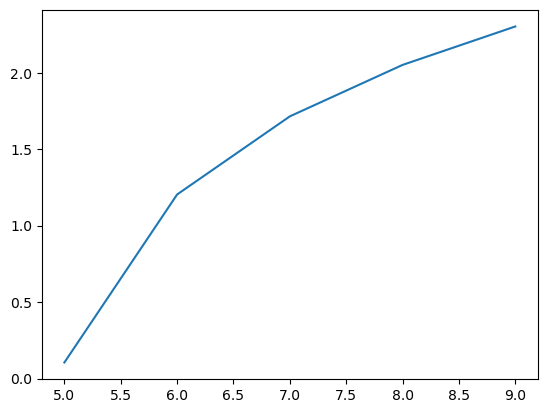

In [ ]:
plt.plot(np.log(np.linspace(-10, 10, 10)))

In [ ]:
##Testing begin

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.exp(-((x-2)**2)) ##rbf formule, elevate the values near to 2

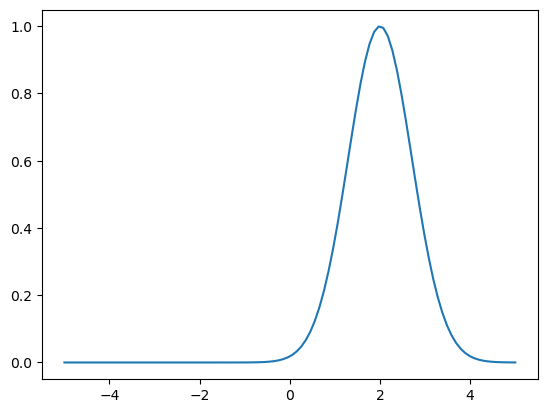

In [ ]:
plt.plot(x, y)

In [ ]:
y1 = np.exp(x)

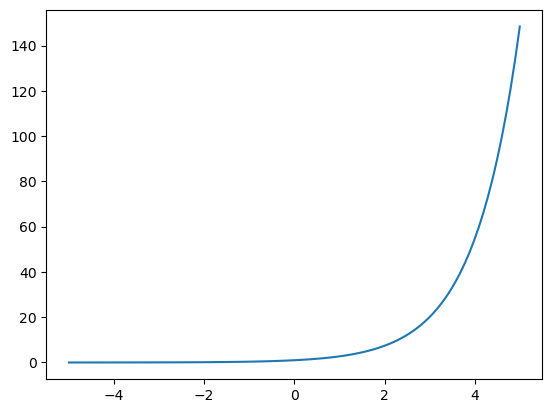

In [ ]:
plt.plot(x, y1) 

In [ ]:
#Test End